In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(60000,28,28,1)/255
test_images = test_images.reshape(10000,28,28,1)/255


4422102/4422102 [==============================] - 1s 0us/step


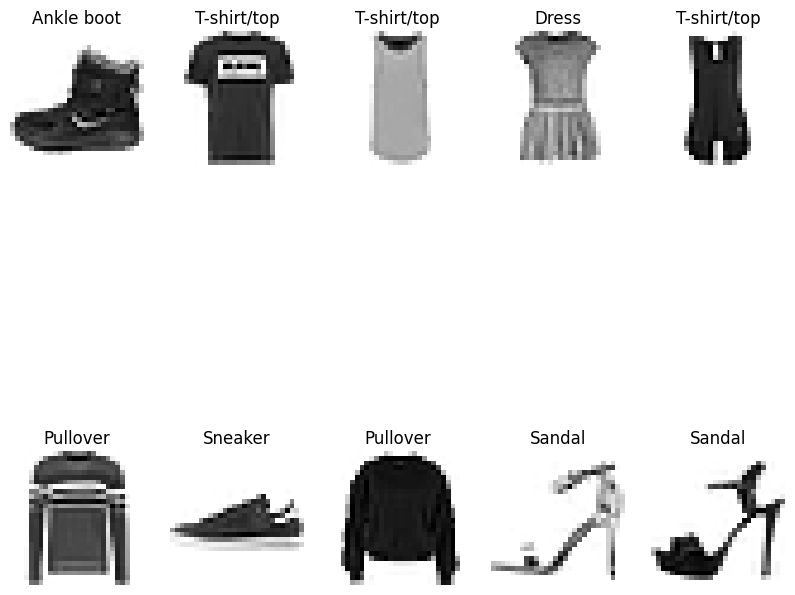

In [3]:
# Define class names for Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the first 10 images with their labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.axis('off')

plt.show()


In [4]:
def build_model(input_size,number_labels) :
  model = models.Sequential()
  model.add(layers.Conv2D(32,(3,3), activation ="relu",input_shape= input_size))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(64,(3,3),activation = "relu"))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(128,(3,3),activation = "relu"))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64,activation="relu"))
  model.add(layers.Dense(number_labels,activation="softmax"))

  model.compile(optimizer = "adam",loss ="sparse_categorical_crossentropy",metrics=['accuracy'])
  model.fit(train_images,train_labels,epochs =10,batch_size = 64, validation_split = 0.2)
  return model


In [5]:
model = build_model((28,28,1),10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

Epoch 1/10
750/750 [==============================] - 16s 6ms/step - loss: 0.6616 - accuracy: 0.7618 - val_loss: 0.5058 - val_accuracy: 0.8200
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4556 - accuracy: 0.8341 - val_loss: 0.4189 - val_accuracy: 0.8449
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3871 - accuracy: 0.8585 - val_loss: 0.3835 - val_accuracy: 0.8602
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.3488 - accuracy: 0.8726 - val_loss: 0.3913 - val_accuracy: 0.8530
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3198 - accuracy: 0.8828 - val_loss: 0.3602 - val_accuracy: 0.8699
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2928 - accuracy: 0.8911 - val_loss: 0.3389 - val_accuracy: 0.8759
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2699 - accuracy: 0.9007 - val_loss: 0.3158 - val_accuracy: 0.8838
Epoch